# The statistics of a Galton Board
#### [V. Hunter Adams](https://vanhunteradams.com)

> - [Setting up the problem](#Setting-up-the-problem)
> - [Distribution for a one-row Galton Board](#Distribution-for-a-one-row-Galton-Board)
> - [Distribution for a two-row Galton Board](#Distribution-for-a-two-row-Galton-Board)
> - [Distribution for a three-row Galton Board](#Distribution-for-a-three-row-Galton-Board)
> - [Distribution for an n-row Galton Board](#Distribution-for-an-n-row-Galton-Board)
> - [Interpretation and relationship to Pascal's Triangle](#Interpretation-and-relationship-to-Pascal's-Triangle)
> - [Convergence to Gaussian by Central Limit Theorem](#Convergence-to-Gaussian-by-Central-Limit-Theorem)
> - [A quick example](#A-quick-example)
> - [But a non-ideal Galton Board still seems to form a Gaussian?!](#But-a-non-ideal-Galton-Board-still-seems-to-form-a-Gaussian?!)

***

In [244]:
from IPython.core.display import HTML

HTML("""
<style>
.output_png {
    display: table-cell;
    text-align: center;
    vertical-align: middle;
}
</style>
""")

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')

In [247]:
import numpy
import matplotlib.pyplot as plt

def plotBinomial(num_rows, overlay=False, showplot=True):
        
    # Compute binomial probabilities
    p = 0.5**(float(num_rows))
    probabilities = numpy.zeros(num_rows+1)
    for i in range(num_rows+1):
        binomial_coefficient = ((numpy.math.factorial(num_rows))/
                                (numpy.math.factorial(i)*numpy.math.factorial(num_rows-i)))
        probabilities[i] = p*binomial_coefficient
        
    # Compute Gaussian probabilities
    gaussian_xvals = numpy.linspace(-1, num_rows+1, 100)
    gaussian_sigma = numpy.sqrt(num_rows/4)
    gaussian_yvals = ((1./(gaussian_sigma*numpy.sqrt(2*numpy.pi)))*
                      numpy.exp(-0.5*(((gaussian_xvals-(num_rows/2.))**2.)/(gaussian_sigma**2.))))
    
    # Should we plot?
    if showplot:
        
        # Setup and beautify
        fig, ax = plt.subplots(figsize=(21, 5))
        ax.tick_params(axis='both', which='major', labelsize=15)
        ax.set_xlabel('Bin number', fontsize=18)
        ax.set_ylabel('Probability mass', fontsize=18)
        ax.set_title(str(num_rows)+'-row Galton Board bin probabilities', fontsize=24)
        
        # Include the Gaussian in the plot?
        if overlay:
            ax.plot(gaussian_xvals, gaussian_yvals, 'r-')
            
        # Plot the binomials
        ax.bar(numpy.arange(num_rows+1), probabilities,
               tick_label=numpy.arange(num_rows+1) if num_rows<25 else None,
               label='Binomial distribution')
        
        # If we've included the Gaussian, add a legend
        if overlay:
            ax.legend(['Gaussian', 'Binomial'], fontsize=18)
        plt.show()
    else:
        return [probabilities, gaussian_yvals]

## Setting up the problem

In an idealized Galton Board, like the one shown below, a ball bounces against a single peg in each row of the board. When the ball strikes the peg, it has a 50 percent probability of bouncing to the left, and a 50 percent probability of bouncing to the right. In this idealization, the outcome of the bounce in each row is completely independent from the bounces in previous rows. An array of bins catch the balls as the fall through the bottom row of the board.

<figure>
    <img align="center" width="700" height="700" src="Galton_labeled.png" alt='missing' />
    <center><figcaption>Fig. 1: Galton Board overview</figcaption></center>
</figure>

We can label each of these bins. Starting from the left, we label the bins with increasing integers starting at 0. The number of bins will be equal to one more than the number of rows in our Galton Board. The ball falls onto the top-center peg, at a position which is *half* the number of rows in the board. For the 5-row Galton Board shown above, for instance, the ball falls onto the board at position 2.5. Each peg strike has a 50 percent probability of increasing its position by $\frac{1}{2}$ (ball falls to the right) and a 50 percent probability of decreasing its position by $\frac{1}{2}$ (ball falls to the left). The bin in which it ultimately lands represents the sum of $N$ such random trials, where $N$ is the number of rows in the board.

Note that we've chosen the $\frac{1}{2}$ step size so that the ball always falls out of the board at an integer position, which corresponds to our labeled bins. We might have chosen different conventions for our bin labels and step sizes. The chosen one, I think, makes the final distributions the most intuitive.

***

## Distribution for a one-row Galton Board

A one-row Galton Board isn't much of Galton Board, its just a peg against which a ball bounces. But it's the simplest case and offers a good starting point! After bouncing against the peg, the ball has a 50 percent probability of decreasing its position by $\frac{1}{2}$ (bouncing left) and a 50 percent probability of increasing its position by $\frac{1}{2}$ (bouncing right). This situation describes a Bernoulli trial - a random experiment with exactly two possible outcomes. To keep the math general for the moment, we'll say that the ball bounces to the left with a probability $p$. Thus, the position of the ball after the first bounce, a random variable that we'll call $X_1$, is given by:

\begin{align}
X_1 \sim \text{Bernoilli}(p)
\end{align}

If we set $p=0.5$, we can generate the (boring and predictable) distribution of balls in the two bins underneath our single peg. For our one-row Galton Board, we assume that the ball is dropped from the x-position 0.5 (half the number of rows). Thus, the ball will leave the Board at position 0 or 1, and has equal probability of landing in either.

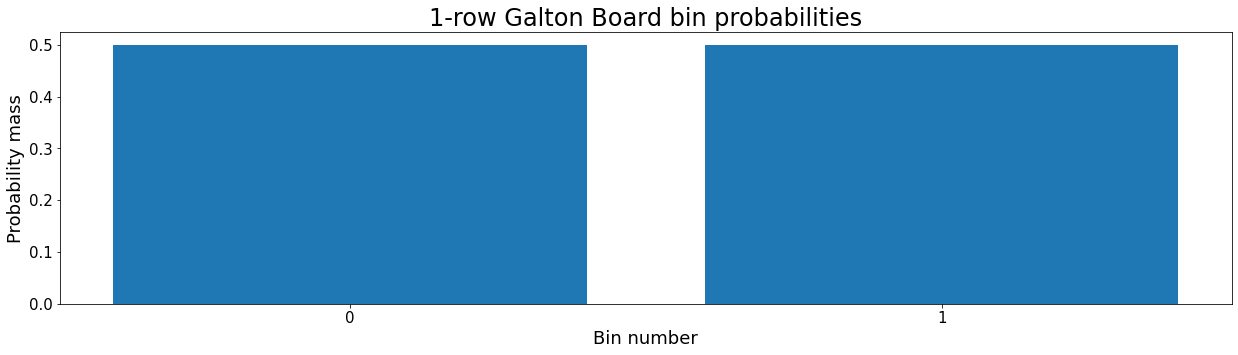

In [248]:
plotBinomial(1)

***

## Distribution for a two-row Galton Board

The distribution for the sum of two random variables is given by the convolution of the probability density function for each random variable (or, in the case of our discrete random variables, the convolution of their probability mass functions). Let us consider the sum of *two* Bernoulli random trials.

\begin{align}
X_1 &\sim \text{Bernoilli}(p)\\
X_2 &\sim \text{Bernoilli}(p)\\
Y &= X_1 + X_2 + \mu
\end{align}

For our idealized Galton board, $X_1$ and $X_2$ each have a 50 percent probability of assuming $\frac{1}{2}$ or -$\frac{1}{2}$, but we'll keep this general and assume an outcome of -$\frac{1}{2}$ with probability $p$. $\mu$, in the above expression, is the position from which the ball is dropped (half the number of rows) and is not a random number. This means that the possible values which $Y$ *could* assume include 0, 1, or 2. We would like to find the probability of each of these outcomes, and to make a nice histogram of those probabilities. This histogram will be the probability mass function for the random variable $Y$.

Let's start by computing each of these probabilities separately, then we'll generalize. For a two-row Galton Board, $\mu=1$. To compute the probability that $Y=0$, we can sum over all possible values for $X_1$ to get:

\begin{align}
P(Y=0) &= P(X_1+X_2=-1)\\
&= P(X_1=-\frac{1}{2},X_2=-\frac{1}{2}) + P(X_1=\frac{1}{2},X_2=-\frac{3}{2})\\
&= P(X_1=-\frac{1}{2})P(X_2=-\frac{1}{2}) + P(X_1=\frac{1}{2})P(X_2=-\frac{3}{2})\\
&= (1-p) \cdot (1-p) + p \cdot 0\\
&= (1-p)^2
\end{align}

(Note that if the required value for $X_2$ in order to achieve $Y=-1$ is impossible, we assign it a probability 0). If we wanted to compute the probability that $Y=0$, we can similarly sum over all possible values for $X_1$:

\begin{align}
P(Y=1) &= P(X_1 + X_2 = 0)\\
&= P(X_1=-\frac{1}{2}, X_2=\frac{1}{2}) + P(X_1=\frac{1}{2},X_2=-\frac{1}{2})\\
&= P(X_1=-\frac{1}{2})P(X_2=\frac{1}{2}) + P(X_1=\frac{1}{2})P(X_2=-\frac{1}{2})\\
&= (1-p) \cdot p + p \cdot (1-p)\\
&= 2p(1-p)
\end{align}

And finally, if we wanted the probability that $Y=1$:

\begin{align}
P(Y=2) &= P(X_1+X_2=1)\\
&= P(X_1=-\frac{1}{2},X_2=\frac{3}{2}) + P(X_1=\frac{1}{2},X_2=\frac{1}{2})\\
&= P(X_1=-\frac{1}{2})P(X_2=\frac{3}{2}) + P(X_1=\frac{1}{2})P(X_2=\frac{1}{2})\\
&= (1-p) \cdot 0 + p \cdot p\\
&= p^2
\end{align}

Which looks like the following:

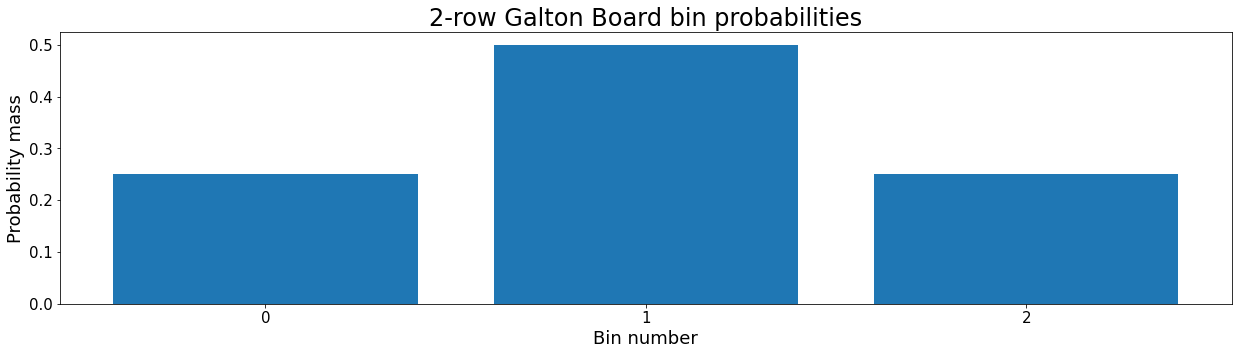

In [249]:
plotBinomial(2)

***

## Distribution for a three-row Galton Board

Let's add one more random variable, so that we can see a pattern emerge. Suppose now that $Y = X_1 + X_2 + X_3 + \mu$. For a 3-row Galton Board, $\mu=1.5$ and $Y$ can assume values 0, 1, 2, and 3. Let us compute the probabilities of each of these values:

Probability that $Y=0$:

\begin{align}
P(Y=0) &= P(X_1+X_2+X_3 = -1.5)\\
&= P(X_3=-\frac{1}{2}, X_1+X_2=-1) + P(X_3=\frac{1}{2}, X_1+X_2=-2)\\
&= P(X_3=-\frac{1}{2})\cdot P(X_1+X_2=-1) + P(X_3=\frac{1}{2})\cdot P(X_1+X_2=-2)\\
&= (1-p) \cdot (1-p)^2 + p \cdot 0\\
&= (1-p)^3
\end{align}

Probability that $Y=1$:
\begin{align}
P(Y=1) &= P(X_1+X_2+X_3=-0.5)\\
&= P(X_3=-\frac{1}{2}, X_1+X_2=0) + P(X_3=\frac{1}{2}, X_1+X_2=-1)\\
&= P(X_3=-\frac{1}{2})\cdot P(X_1+X_2=0) + P(X_3=\frac{1}{2})\cdot P(X_1+X_2)=-1\\
&= (1-p) \cdot 2p(1-p) + p(1-p)^2\\
&= 2p(1-p)^2 + p(1-p)^2\\
&= 3p(1-p)^2
\end{align}

Probability that $Y=2$:
\begin{align}
P(Y=2) &= P(X_1+X_2+X_3=0.5)\\
&= P(X_3=-\frac{1}{2}, X_1+X_2=1) + P(X_3=\frac{1}{2}, X_1+X_2=0)\\
&= P(X_3=-\frac{1}{2})\cdot P(X_1+X_2=1) + P(X_3=\frac{1}{2})\cdot P(X_1+X_2)=0\\
&= (1-p) \cdot p^2 + p\cdot 2p(1-p)\\
&= p^2(1-p) + 2p^2(1-p)\\
&= 3p^2(1-p)
\end{align}

Probability that $Y=3$:
\begin{align}
P(Y=3) &= P(X_1+X_2+X_3=1.5)\\
&= P(X_3=-\frac{1}{2}, X_1+X_2=2) + P(X_3=\frac{1}{2}, X_1+X_2=1)\\
&= P(X_3=-\frac{1}{2})\cdot P(X_1+X_2=2) + P(X_3=\frac{1}{2})\cdot P(X_1+X_2=1)\\
&= (1-p) \cdot 0 + p \cdot p^2\\
&= p^3
\end{align}

Which looks like the following:


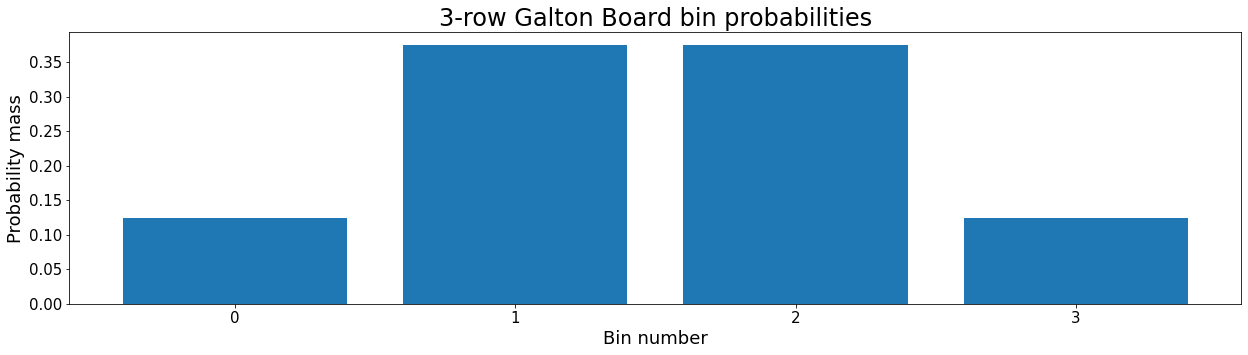

In [250]:
plotBinomial(3)

***

## Distribution for an n-row Galton Board

At this point, we can see a pattern emerging. In the expression below, $k$ is the position of the bin as labeled in the figure at the top of the webpage, and $n$ is the total number of rows in the Galton board.

\begin{align}
P(Y=k) &= \begin{pmatrix}n\\k\end{pmatrix}p^{k}(1-p)^{n-k}
\end{align}

The Binomial distribution describes the sum of Bernoilli trials. And in the case of our idealized Galton board $p=0.5$, and so this simplifies even further.

\begin{align}
P(Y=k) &= \begin{pmatrix}n\\k\end{pmatrix}\frac{1}{2^n}
\end{align}

As we increase the number of rows in our Galton Board, here's what happens to our distribution. Do you see an old friend emerging?

In [255]:
import matplotlib.pyplot as plt
from matplotlib import animation, rc

def barlist(n): 
    probs = plotBinomial(n, False, False)[0]
    probabilities = numpy.zeros(51)
    for i in range(len(probs)):
        probabilities[i] = probs[i]
    return probabilities

# fig=plt.figure(figsize=(20, 5))
fig, ax = plt.subplots(figsize=(21, 5))
ax.tick_params(axis='both', which='major', labelsize=15)
ax.set_xlabel('Bin number', fontsize=18)
ax.set_ylabel('Probability mass', fontsize=18)
ax.set_title(str(1)+'-row Galton Board bin probabilities', fontsize=24)

# Compute Gaussian probabilities
# gaussian_xvals = numpy.linspace(-1, 1+2, 100)
# gaussian_sigma = numpy.sqrt(1/4.)
# gaussian_yvals = ((1./(gaussian_sigma*numpy.sqrt(2*numpy.pi)))*
#                   numpy.exp(-0.5*(((gaussian_xvals-(num_rows/2.))**2.)/(gaussian_sigma**2.))))

# line, = ax.plot(gaussian_xvals, gaussian_yvals, 'r-')

n =50 #Number of frames
x = numpy.arange(51)
barcollection = plt.bar(x,barlist(1))

def animate(i):
    y=barlist(i+1)
    ax.set_title(str(i+1)+'-row Galton Board bin probabilities', fontsize=24)
    gaussian_xvals = numpy.linspace(-1, i+2, 100)
    gaussian_sigma = numpy.sqrt((i+1)/4.)
    gaussian_yvals = ((1./(gaussian_sigma*numpy.sqrt(2*numpy.pi)))*
                      numpy.exp(-0.5*(((gaussian_xvals-((i+1)/2.))**2.)/(gaussian_sigma**2.))))
#     line.set_data([gaussian_xvals, gaussian_yvals])
    for i, b in enumerate(barcollection):
        b.set_height(y[i])

anim=animation.FuncAnimation(fig,animate,repeat=False,blit=False,frames=n,
                             interval=100)
plt.close()
rc('animation', html='jshtml')

In [256]:
anim

***

## Interpretation and relationship to Pascal's Triangle

Pascal's Triangle is famously composed of the binomial coefficients. In this particular situation, these coefficients have a delightfully physical interpretation. The $\frac{1}{2^n}$ term in the above expression represents the probability that the ball follows any one *particular* path. A path is described by a sequence of left/right bounces, and the probability of each of those bounces being in the correct direction is $\frac{1}{2}$. So, all paths have an equal probability of $\frac{1}{2^n}$.

The binomial coefficient represents the *number of paths* that leads to a particular bin. The probability of the ball landing in a particular bin can be found by summing the probabilities of each path that leads to that bin. For the Galton Board, the binomial coefficients provide this number of paths! Fig. 2 below shows the single path that leads to the right-most bin, and the 5 paths that lead to the first bin in from the left.

<figure>
    <img align="center" width="700" height="700" src="Pascal.png" alt='missing' />
    <center><figcaption>Fig. 2: Pascal's Triangle shows number of paths to each peg/bin</figcaption></center>
</figure>

***

## Convergence to Gaussian by Central Limit Theorem

In the animation above, you may have noticed that a very familiar shape appears as the number of rows in our Galton Board increases. It's the ubiquitous Gaussian!!

We are observing the Central Limit Theorem in action. The central limit theorem states that the sum of independent and identically-distributed random numbers, all of which have finite variance and expected value, converges to a Gaussian as the number of random variables in that sum approaches infinity. This is true *no matter the distribution of the random numbers being summed*. This leads to some deep questions (e.g., "why a Guassian?") that are beyond the scope of this document, but for some discussion of these deeper questions I can recommend [3Blue1Brown](https://www.youtube.com/watch?v=zeJD6dqJ5lo).

In our case, the distribution of balls in the bins at the bottom of the Galton Board represents the sum of $N$ Bernoilli trials, where $N$ is the number of rows in the Galton Board. So, as the size of our Galton Board increases, the binomial distribution which describes the ball distribution in the bins approaches a Gaussian distribution.

A Gaussian distribution is fully specified by its mean and its standard deviation, as shown in the general expression below. So, what are the mean and standard deviation of the Gaussian which approximates our Galton Board distribution for some number of rows? We can figure this out directly from the Bernoilli trial that describes each bounce.

\begin{align}
p(x) &= \frac{1}{\sigma \sqrt{2\pi}} e^{-\frac{1}{2}\frac{(x - \mu)^2}{\sigma^2}}
\end{align}

Let us reconsider the [distribution for a one-row Galton Board](#Distribution-for-a-one-row-Galton-Board) from the top of this page. Recall that we called the random number that describes the ball's position *after* the bounce as $X_1$, and we stated that $X_1$ has an equal probability of assuming a value of $\frac{1}{2}$ or -$\frac{1}{2}$ relative to the position from which it is dropped. What is the expected value and variance for this random number?

The expected value . . .
\begin{align}
E[X_1]&= \sum_{i\in\{-\frac{1}{2},\frac{1}{2}\}}x_ip_i\\
&= 0.5 \cdot \left(-\frac{1}{2}\right) + 0.5 \left(\frac{1}{2}\right)\\
&= -\frac{1}{4} + \frac{1}{4}\\
&= 0
\end{align}

And the variance . . .

\begin{align}
\text{Var}(X_1) &= E\left[(X_1 - E[X_1])^2\right]\\
&= E\left[(X_1-0)^2\right]\\
&= E\left[X_1^2\right]\\
&= \sum_{i\in\{-\frac{1}{2},\frac{1}{2}\}}x_i^2p_i\\
&= 0.5 \cdot \left(-\frac{1}{2}\right)^2 + 0.5 \left(\frac{1}{2}\right)^2\\
&= \frac{1}{8} + \frac{1}{8}\\
&= \frac{1}{4}
\end{align}

For sums of independent random numbers, the mean and variance just add! So, if $Y = X_1 + X_2 + X_3 + ... + X_N$, then the following is true:

\begin{align}
\mu_Y &= N\cdot \mu_{X_i} = N \cdot 0 = 0\\
\text{Var}(Y) &= N \cdot \text{Var}(X_i) = N\cdot \frac{1}{4} = \frac{N}{4}
\end{align}

In our case, we'll offset our mean by the (non-random) position from which the ball is dropped into the board, which is *half* the number of rows in the board:

\begin{align}
\mu_Y &= \frac{N}{2}\\
\text{Var}(Y) &= \frac{N}{4}\\
\sigma_y &= \sqrt{\text{Var}(Y)} = \sqrt{\frac{N}{4}}
\end{align}

And so, the Gaussian which approximates our binomial distribution is given by

\begin{align}
p(x) &= \frac{1}{\sqrt{\frac{N}{4}} \sqrt{2\pi}} e^{-\frac{1}{2}\frac{(x - \frac{N}{2})^2}{\frac{N}{4}}}\\
&= \frac{2}{\sqrt{2N\pi}}e^{-\frac{1}{2}\frac{4(x - \frac{N}{2})^2}{N}}
\end{align}

Here is how our Guassian approximation compares to the binomial distribution for Galton Boards with an increasing number of rows:

In [263]:
# fig=plt.figure(figsize=(20, 5))
fig1, ax1 = plt.subplots(figsize=(21, 5))
ax1.tick_params(axis='both', which='major', labelsize=15)
ax1.set_xlabel('Bin number', fontsize=18)
ax1.set_ylabel('Probability mass', fontsize=18)
ax1.set_title(str(1)+'-row Galton Board bin probabilities', fontsize=24)

# Compute Gaussian probabilities
gaussian_xvals = numpy.linspace(-1, 1+2, 100)
gaussian_sigma = numpy.sqrt(1/4.)
gaussian_yvals = ((1./(gaussian_sigma*numpy.sqrt(2*numpy.pi)))*
                  numpy.exp(-0.5*(((gaussian_xvals-(num_rows/2.))**2.)/(gaussian_sigma**2.))))

line, = ax1.plot(gaussian_xvals, gaussian_yvals, 'r-')

n =50 #Number of frames
x = numpy.arange(51)
barcollection = plt.bar(x,barlist(1))

def animate1(i):
    y=barlist(i+1)
    ax1.set_title(str(i+1)+'-row Galton Board bin probabilities', fontsize=24)
    gaussian_xvals = numpy.linspace(-1, i+2, 100)
    gaussian_sigma = numpy.sqrt((i+1)/4.)
    gaussian_yvals = ((1./(gaussian_sigma*numpy.sqrt(2*numpy.pi)))*
                      numpy.exp(-0.5*(((gaussian_xvals-((i+1)/2.))**2.)/(gaussian_sigma**2.))))
    line.set_data([gaussian_xvals, gaussian_yvals])
    for i, b in enumerate(barcollection):
        b.set_height(y[i])
    ax1.legend(['Gaussian', 'Binomial'], fontsize=18)

anim1=animation.FuncAnimation(fig1,animate1,repeat=False,blit=False,frames=n,
                             interval=100)
plt.close()
rc('animation', html='jshtml')

In [264]:
anim1

***

## A quick example

Let's suppose that we have a 1600-row Galton Board. Which range of bins will catch 68% of the balls?

For a Gaussian, 68% of data (in our case, dropped balls) fall within one standard deviation of the mean. 95% fall within two standard deviations. And 99.7% fall within three standard deviations. The standard deviation of a 1600-row Galton Board is $\sqrt{\frac{1600}{4}} = 20$. So, 68% of balls will land in bins that are within 20 position from which the ball is dropped ($\frac{2000}{2}=1000$).

So, the range of bins that will catch 68% of balls (slightly more), is 980-1020. We figured that out really fast! The central limit theorem allows for these sorts of shortcuts *if the conditions under which it is true are satisfied!* That is, all our random variables are independent, identically distributed, and have finite variance/expected value.

***

## But a non-ideal Galton Board still seems to form a Gaussian?!

The Galton Board was invented as a physical device, and indeed you can find many physical Galton Boards in science museums, or even purchase a toy one for yourself! In a physical Galton Board, the balls appear to form a Gaussian (just like in the idealized one described above) despite the fact that some of the conditions that are required for the CLT to hold are not satisfied. All random numbers, in a physical Galton Board, are not independent. A particular bounce in row $k$ will affect my bounce in row $k+1$. And they aren't all identically distributed! The direction with which a ball bounces off a peg depends on the angle at which it struck it. So . . . what's going on?

There exist generalizations of the central limit theorem which apply to [mixing processes](https://eudml.org/doc/77475). That is, a process in which the next random number in the process has a statistical dependence on the previous ones. If this statistical dependence goes to zero sufficiently quickly, then a generalization of the CLT still holds. In the case of the Galton Board, the ball "forgets" about a previous bounce after a few more bounces. Though successive bounces may be correlated, the overall behavior over many bounces becomes independent.

***